# WeatherPy

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

### Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

587

### Perform API Calls

In [3]:
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Create variables
times = 0
response = []
city_name = []
max_temp = []
humidity = []
cloudliness = []
wind_speed = []
city_data = []
whole_dataset = []

# Loop through a list of cities and do a weather check
for city in cities:
    try:
        response = requests.get(query_url + city).json()
        
        # Find city, country, lat, long, temperature, humidity, cloudiness, and wind speed
        city_name =(response['name'])
        max_temp = (response['main']['temp_max'])
        humidity = (response['main']['humidity'])
        cloudiness = (response['clouds']['all'])
        wind_speed = (response['wind']['speed'])
        lat = (response['coord']['lat'])
        long = (response['coord']['lon'])
        country = (response['sys']['country'])

        
        # Add data with labels to list and append
        city_data = ({
            "City" :city_name,
            "Country" :country,
            "Latitude" :lat,
            "Longitude" :long,
            "Max Temperature" :max_temp,
            "Humidity" :humidity,
            "Cloudiness" :cloudiness,
            "Wind Speed" :wind_speed,
        })
        whole_dataset.append(city_data)
        
    # Skip the city if not found
    except:
        print(f"City not found. Skipping...")
    
    times = times + 1      
    print(f"Processing record {times} | {city_name}")

print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing record 1 | Vaini
City not found. Skipping...
Processing record 2 | Vaini
Processing record 3 | Mataura
City not found. Skipping...
Processing record 4 | Mataura
Processing record 5 | Ushuaia
Processing record 6 | Hobart
Processing record 7 | Kruisfontein
Processing record 8 | Hasaki
Processing record 9 | Rikitea
Processing record 10 | Santa Rosa
Processing record 11 | Iqaluit
Processing record 12 | Bredasdorp
Processing record 13 | Kapaa
Processing record 14 | Cape Town
Processing record 15 | Raahe
Processing record 16 | Mezinovskiy
Processing record 17 | Sekoma
Processing record 18 | Follonica
Processing record 19 | Owatonna
Processing record 20 | Okha
Processing record 21 | Hofn
Processing record 22 | Yellowknife
Processing record 23 | São João da Barra
Processing record 24 | Pop
Processing record 25 | Leningradskiy
Processing record 26 | Naze
Processing record 27 | Nabire
Processing record 28 | Dakar
City not fou

Processing record 233 | Capaci
Processing record 234 | Clyde River
Processing record 235 | Cherskiy
Processing record 236 | Jacareacanga
Processing record 237 | Bridgetown
Processing record 238 | Tolyatti
Processing record 239 | Nelson Bay
Processing record 240 | Takoradze
Processing record 241 | Kahului
Processing record 242 | Sur
Processing record 243 | Ponta do Sol
Processing record 244 | Øksfjord
Processing record 245 | Rockland
Processing record 246 | Norman Wells
Processing record 247 | Ereymentau
Processing record 248 | Coyhaique
Processing record 249 | Banda Aceh
Processing record 250 | Buinsk
Processing record 251 | Briançon
Processing record 252 | Meghri
Processing record 253 | Garça
Processing record 254 | Minot
Processing record 255 | Taltal
Processing record 256 | Faya
Processing record 257 | Bethel
City not found. Skipping...
Processing record 258 | Bethel
City not found. Skipping...
Processing record 259 | Bethel
Processing record 260 | Lagoa
Processing record 261 | Chab

Processing record 469 | Middelburg
Processing record 470 | Arrondissement de Villefranche-de-Rouergue
Processing record 471 | Plettenberg Bay
Processing record 472 | Belém
Processing record 473 | Tanete
Processing record 474 | Linxia Chengguanzhen
Processing record 475 | Moerai
Processing record 476 | Mabaruma
Processing record 477 | Qarqīn
Processing record 478 | Poddor'ye
Processing record 479 | Kadoshkino
Processing record 480 | Almeirim
City not found. Skipping...
Processing record 481 | Almeirim
Processing record 482 | Preobrazheniye
Processing record 483 | Northport
Processing record 484 | Batagay
Processing record 485 | Sioux Falls
Processing record 486 | Opuwo
City not found. Skipping...
Processing record 487 | Opuwo
Processing record 488 | Petropavlovsk-Kamchatskiy
Processing record 489 | Shenzhen
Processing record 490 | Viedma
Processing record 491 | Rome
Processing record 492 | Santa Fe
Processing record 493 | Mitú
Processing record 494 | Uyuni
City not found. Skipping...
Pr

### Convert Raw Data to DataFrame

In [4]:
# Create city data dataframe
city_data_df = pd.DataFrame(whole_dataset)
city_data_df

,City,Country,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed
0,Vaini,TO,-21.2000,-175.2000,80.76,89,75,14.97
1,Mataura,NZ,-46.1927,168.8643,46.47,67,100,3.80
2,Ushuaia,AR,-54.8000,-68.3000,42.46,61,40,2.30
3,Hobart,AU,-42.8794,147.3294,53.26,68,75,6.91
4,Kruisfontein,ZA,-34.0033,24.7314,53.89,92,99,8.99
...,...,...,...,...,...,...,...,...
536,Adrar,MR,20.5022,-10.0711,96.37,7,17,22.03
537,Korla,CN,41.7597,86.1469,87.04,26,98,16.22
538,Sayyan,YE,15.1718,44.3244,58.46,77,100,4.92
539,Verkhnevilyuysk,RU,63.4453,120.3167,62.94,63,90,6.33


In [5]:
# Export dataframe to CSV file
city_data_df.to_csv("city_data.csv")

### Plotting the data

#### Latitude vs. Temperature Plot

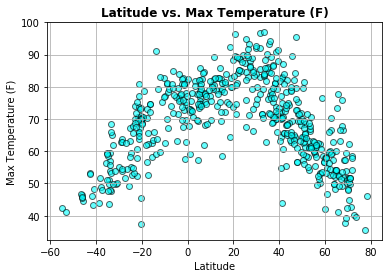

In [6]:
# Build scatter plot with data
plt_temp = city_data_df['Max Temperature']
plt_lat = city_data_df['Latitude']

plt.scatter(plt_lat, plt_temp, facecolor = "cyan", edgecolor="black", linewidths=1, marker="o", alpha=0.6)

# Add labels
plt.title("Latitude vs. Max Temperature (F)", fontweight = "bold")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

plt.savefig("./images/latitude_vs_temperature", bbox_inches='tight')

plt.show()

#### Latitude vs. Humidity Plot

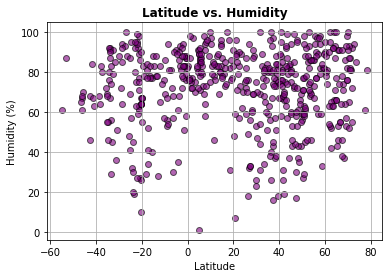

In [7]:
# Build scatter plot with data
plt_hum = city_data_df['Humidity']

plt.scatter(plt_lat, plt_hum, facecolor = "purple", edgecolor="black", linewidths=1, marker="o", alpha=0.6)

# Add labels
plt.title("Latitude vs. Humidity", fontweight = "bold")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

plt.savefig("./images/latitude_vs_humidity", bbox_inches='tight')

plt.show()

####  Latitude vs. Cloudiness Plot

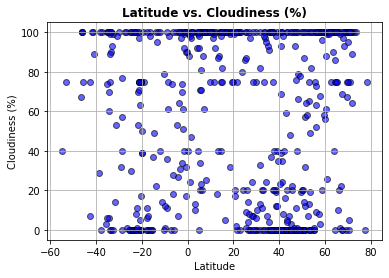

In [8]:
# Build scatter plot with data
plt_cloud = city_data_df['Cloudiness']

plt.scatter(plt_lat, plt_cloud, facecolor = "blue", edgecolor="black", linewidths=1, marker="o", alpha=0.6)

# Add labels
plt.title("Latitude vs. Cloudiness (%)", fontweight = "bold")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

plt.savefig("./images/latitude_vs_cloudiness", bbox_inches='tight')

plt.show()

#### Latitude vs. Wind Speed Plot

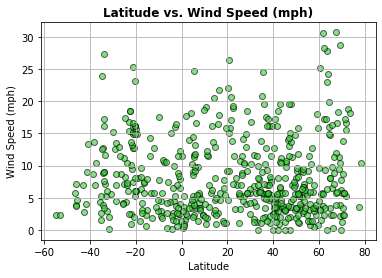

In [9]:
# Build scatter plot with data
plt_wind = city_data_df['Wind Speed']

plt.scatter(plt_lat, plt_wind, facecolor = "limegreen", edgecolor="black", linewidths=1, marker="o", alpha=0.6)

# Add labels
plt.title("Latitude vs. Wind Speed (mph)", fontweight = "bold")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

plt.savefig("./images/latitude_vs_wind_speed", bbox_inches='tight')

plt.show()

### Linear Regression

In [10]:
# Create a function to create Linear Regression plots
def plot_linear_regression(x_values,y_values,text_coordinates):
    
    # Run regression on Southern Hemisphere
    (slope, intercept, rvalue, pvalue, stderr) = linregress (x_values,y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))
    
    # Plot
    plt.scatter(x_values,y_values, facecolor = "blue", edgecolor="black", linewidths=1, marker="o", alpha=0.6)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq,text_coordinates, fontsize=15, color="red")
    plt.xlabel("Latitude")
    
    print(f"The r-squared is: {rvalue}")

    plt.show()

In [11]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemi_df = city_data_df.loc[(city_data_df["Latitude"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Latitude"] <0)]

#### Northern Hemisphere - Temperature (F) vs. Latitude

The r-squared is: -0.6651305578153461


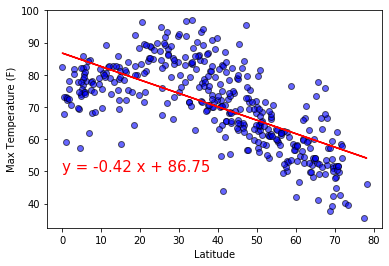

<Figure size 432x288 with 0 Axes>

In [12]:
# Define values
x_values = northern_hemi_df ["Latitude"]
y_values = northern_hemi_df ["Max Temperature"]

# Plot
plt.ylabel("Max Temperature (F)")

plot_linear_regression(x_values,y_values, (0,50))


plt.savefig("./images/n_temp_vs_latitude", bbox_inches='tight')
plt.show()

#### Southern Hemisphere - Temperature (F) vs. Latitude

The r-squared is: 0.7802853478591588


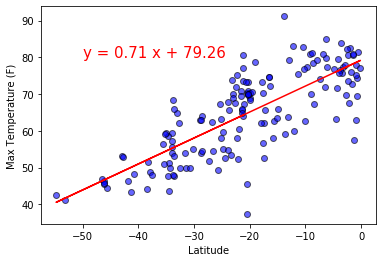

<Figure size 432x288 with 0 Axes>

In [13]:
# Define values
x_values = southern_hemi_df ["Latitude"]
y_values = southern_hemi_df ["Max Temperature"]

# Plot
plt.ylabel("Max Temperature (F)")

plot_linear_regression(x_values,y_values, (-50,80))

plt.savefig("./images/s_temp_vs_latitude", bbox_inches='tight')
plt.show()

#### Northern Hemisphere - Humidity (%) vs. Latitude

The r-squared is: -0.08653551660352927


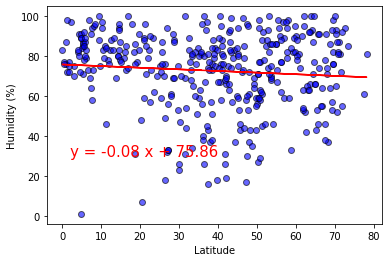

<Figure size 432x288 with 0 Axes>

In [14]:
# Define values
x_values = northern_hemi_df ["Latitude"]
y_values = northern_hemi_df ["Humidity"]

# Plot
plt.ylabel("Humidity (%)")
plot_linear_regression(x_values,y_values, (2,30))

plt.savefig("./images/n_humidity_vs_latitude", bbox_inches='tight')
plt.show()

#### Southern Hemisphere - Humidity (%) vs. Latitude

The r-squared is: 0.10880834986069053


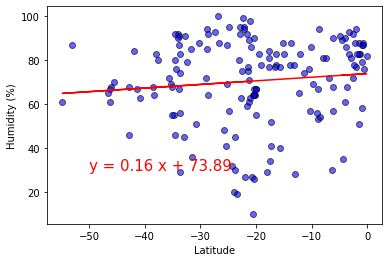

<Figure size 432x288 with 0 Axes>

In [15]:
# Define values
x_values = southern_hemi_df ["Latitude"]
y_values = southern_hemi_df ["Humidity"]

# Plot
plt.ylabel("Humidity (%)")
plot_linear_regression(x_values,y_values, (-50,30))

plt.savefig("./images/s_humidity_vs_latitude", bbox_inches='tight')
plt.show()

#### Northern Hemisphere - Cloudiness (%) vs. Latitude

The r-squared is: -0.08053899102783874


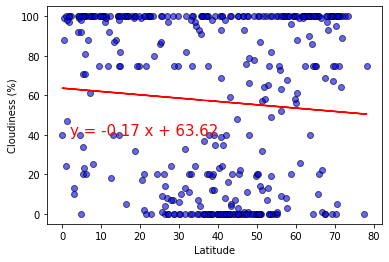

<Figure size 432x288 with 0 Axes>

In [16]:
# Define values
x_values = northern_hemi_df ["Latitude"]
y_values = northern_hemi_df ["Cloudiness"]

# Plot
plt.ylabel("Cloudiness (%)")
plot_linear_regression(x_values,y_values, (2,40))

plt.savefig("./images/n_cloudiness_vs_latitude", bbox_inches='tight')
plt.show()

#### Southern Hemisphere - Cloudiness (%) vs. Latitude

The r-squared is: -0.025764687400721832


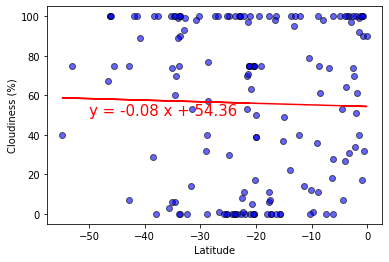

<Figure size 432x288 with 0 Axes>

In [17]:
# Define values
x_values = southern_hemi_df ["Latitude"]
y_values = southern_hemi_df ["Cloudiness"]

# Plot
plt.ylabel("Cloudiness (%)")
plot_linear_regression(x_values,y_values, (-50,50))

plt.savefig("./images/s_cloudiness_vs_latitude", bbox_inches='tight')
plt.show()

#### Northern Hemisphere - Wind Speed (mph) vs. Latitude

The r-squared is: 0.05112215925059339


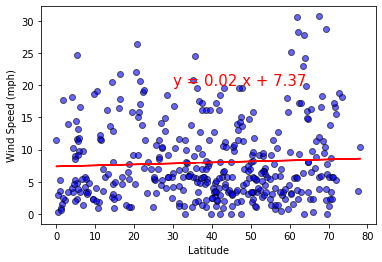

<Figure size 432x288 with 0 Axes>

In [18]:
# Define values
x_values = northern_hemi_df ["Latitude"]
y_values = northern_hemi_df ["Wind Speed"]

# Plot
plt.ylabel("Wind Speed (mph)")
plot_linear_regression(x_values,y_values, (30,20))

plt.savefig("./images/n_wind_vs_latitude", bbox_inches='tight')
plt.show()

#### Southern Hemisphere - Wind Speed (mph) vs. Latitude

The r-squared is: -0.11949720565588437


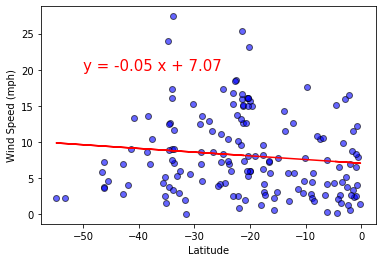

<Figure size 432x288 with 0 Axes>

In [19]:
# Define values
x_values = southern_hemi_df ["Latitude"]
y_values = southern_hemi_df ["Wind Speed"]

# Plot
plt.ylabel("Wind Speed (mph)")
plot_linear_regression(x_values,y_values, (-50,20))

plt.savefig("./images/s_wind_vs_latitude", bbox_inches='tight')
plt.show()